# Import libaries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
!pip install textract


In [2]:
import os 
import re 
import nltk 
import spacy 
import string 
import textract 

from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer , WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')



# Reading the file

In [3]:
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [7]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [8]:
df.review[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [9]:
df.sentiment

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [10]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

# Getting word_count in the Text

In [12]:
df['word_count'] = df['review'].apply(lambda x:len(str(x).split(" ")))
df[['review','word_count']].head()

,review,word_count
0,One of the other reviewers has mentioned that ...,307
1,A wonderful little production. <br /><br />The...,162
2,I thought this was a wonderful way to spend ti...,166
3,Basically there's a family where a little boy ...,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",230


# Getting the char_count from the text 

In [13]:
df['char_count']=df['review'].str.len() # this also inculde spaces
df[['review','char_count']].head()

,review,char_count
0,One of the other reviewers has mentioned that ...,1761
1,A wonderful little production. <br /><br />The...,998
2,I thought this was a wonderful way to spend ti...,926
3,Basically there's a family where a little boy ...,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1317


# Getting the stopWords

In [14]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Stopwords'] = df['review'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['review','Stopwords']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAGARJUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,Stopwords
0,One of the other reviewers has mentioned that ...,122
1,A wonderful little production. <br /><br />The...,62
2,I thought this was a wonderful way to spend ti...,70
3,Basically there's a family where a little boy ...,58
4,"Petter Mattei's ""Love in the Time of Money"" is...",92


# Getting Numerics

In [15]:
df['Numerics'] = df['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['review','Numerics']].head()

,review,Numerics
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [16]:
df

,review,sentiment,word_count,char_count,Stopwords,Numerics
0,One of the other reviewers has mentioned that ...,positive,307,1761,122,1
1,A wonderful little production. <br /><br />The...,positive,162,998,62,0
2,I thought this was a wonderful way to spend ti...,positive,166,926,70,0
3,Basically there's a family where a little boy ...,negative,138,748,58,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317,92,0
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,1008,96,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642,46,0
49997,I am a Catholic taught in parochial elementary...,negative,230,1280,103,0
49998,I'm going to have to disagree with the previou...,negative,212,1234,93,1


# Preprocess 

In [17]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+','',cleantext)
    rem_num = re.sub('[0-9]+','',rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w)>2 if not w in stopwords.words('english')]
    
    return " ".join(filtered_words)

In [19]:
df['clean_review'] = df.review.apply(lambda x:preprocess(x))

In [20]:
df.head()

,review,sentiment,word_count,char_count,Stopwords,Numerics,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1761,122,1,one reviewers mentioned watching episode hooke...
1,A wonderful little production. <br /><br />The...,positive,162,998,62,0,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,166,926,70,0,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,138,748,58,1,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317,92,0,petter mattei love time money visually stunnin...


In [21]:
df.drop(['review'],axis=1,inplace=True)
df.head()  

,sentiment,word_count,char_count,Stopwords,Numerics,clean_review
0,positive,307,1761,122,1,one reviewers mentioned watching episode hooke...
1,positive,162,998,62,0,wonderful little production filming technique ...
2,positive,166,926,70,0,thought wonderful way spend time hot summer we...
3,negative,138,748,58,1,basically family little boy jake thinks zombie...
4,positive,230,1317,92,0,petter mattei love time money visually stunnin...


In [22]:
df.to_csv('clean_review.csv', index=False)


In [23]:
df1= pd.read_csv("clean_review.csv")


In [24]:
df1

,sentiment,word_count,char_count,Stopwords,Numerics,clean_review
0,positive,307,1761,122,1,one reviewers mentioned watching episode hooke...
1,positive,162,998,62,0,wonderful little production filming technique ...
2,positive,166,926,70,0,thought wonderful way spend time hot summer we...
3,negative,138,748,58,1,basically family little boy jake thinks zombie...
4,positive,230,1317,92,0,petter mattei love time money visually stunnin...
...,...,...,...,...,...,...
49995,positive,194,1008,96,1,thought movie right good job creative original...
49996,negative,112,642,46,0,bad plot bad dialogue bad acting idiotic direc...
49997,negative,230,1280,103,0,catholic taught parochial elementary schools n...
49998,negative,212,1234,93,1,going disagree previous comment side maltin on...


In [25]:
df.clean_review[5]

'probably time favorite movie story selflessness sacrifice dedication noble cause preachy boring never gets old despite seen times last years paul lukas performance brings tears eyes bette davis one truly sympathetic roles delight kids grandma says like dressed midgets children makes fun watch mother slow awakening happening world roof believable startling dozen thumbs movie'

# Getting Most Common words used 

In [29]:
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
oneSetOfWords = set(stopwords.words('english')+['``',"''"])
totalWords=[]
Sentences= df1['clean_review'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requireWords = nltk.word_tokenize(cleanedText)
    for word in requireWords:
        if word not in oneSetOfWords and word not in string.punctuation:
            totalWords.append(word)
            
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAGARJUNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('movie', 87934), ('film', 79672), ('one', 53585), ('like', 40160), ('good', 29737), ('time', 25099), ('even', 24856), ('would', 24599), ('story', 23108), ('really', 23089), ('see', 23021), ('well', 21259), ('much', 19314), ('bad', 18461), ('get', 18414), ('people', 18181), ('great', 18136), ('also', 17972), ('first', 17576), ('made', 16150), ('make', 15891), ('way', 15644), ('could', 15562), ('movies', 15301), ('characters', 14444), ('think', 14334), ('watch', 13939), ('character', 13900), ('films', 13750), ('two', 13541), ('many', 13444), ('seen', 13413), ('love', 13005), ('never', 12979), ('plot', 12976), ('life', 12911), ('acting', 12858), ('show', 12654), ('best', 12611), ('know', 12508), ('little', 12430), ('ever', 12019), ('man', 11820), ('better', 11426), ('end', 11115), ('scene', 10960), ('still', 10855), ('say', 10767), ('scenes', 10472), ('something', 10145)]


In [30]:
!python -m spacy download en_core_web_lg

import spacy
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


     -------------------------------------- 587.7/587.7 MB 1.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [31]:
for token in doc_block[:30]:
    print(token,token.pos_)

seamless ADJ
editing NOUN
guided VERB
references NOUN
williams PROPN
diary PROPN
entries NOUN
well ADV
worth ADJ
watching VERB
terrificly NOUN
written VERB
performed VERB
piece NOUN
masterful ADJ
production NOUN
one NUM
great ADJ
master NOUN
comedy NOUN
life NOUN
realism NOUN
really ADV
comes VERB
home ADV
little ADJ
things NOUN
fantasy NOUN
guard NOUN
rather ADV


In [32]:
one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['editing', 'guided', 'references', 'entries', 'watching', 'terrificly', 'written', 'performed', 'piece', 'production', 'master', 'comedy', 'life', 'realism', 'comes', 'things', 'fantasy', 'guard', 'use', 'dream', 'techniques', 'remains', 'disappears', 'plays', 'knowledge', 'senses', 'scenes', 'concerning', 'halliwell', 'sets', 'halliwell', 'murals', 'decorating', 'surface', 'way', 'spend', 'time', 'summer', 'weekend', 'sitting', 'air', 'conditioned', 'theater', 'watching', 'comedy', 'plot', 'dialogue', 'characters', 'bread', 'suspected', 'killer', 'disappointed', 'realize', 'match', 'point', 'risk', 'addiction', 'thought', 'proof', 'allen', 'control', 'style', 'love', 'laughed', 'comedies', 'years', 'decade', 'impressed', 'managed', 'tone', 'image', 'jumped', 'woman', 'crown', 'jewel', 'career', 'devil', 'wears', 'comedy', 'see', 'family', 'thinks', 'closet', 'parents', 'fighting', 'time', 'movie', 'soap', 'opera', 'decides', 'become', 'kill', 'going', 'make', 'film', 'decide', 'thril

In [33]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,film,9
1,time,6
2,see,6
3,way,5
4,movie,5
5,show,5
6,watching,3
7,comedy,3
8,characters,3
9,years,3


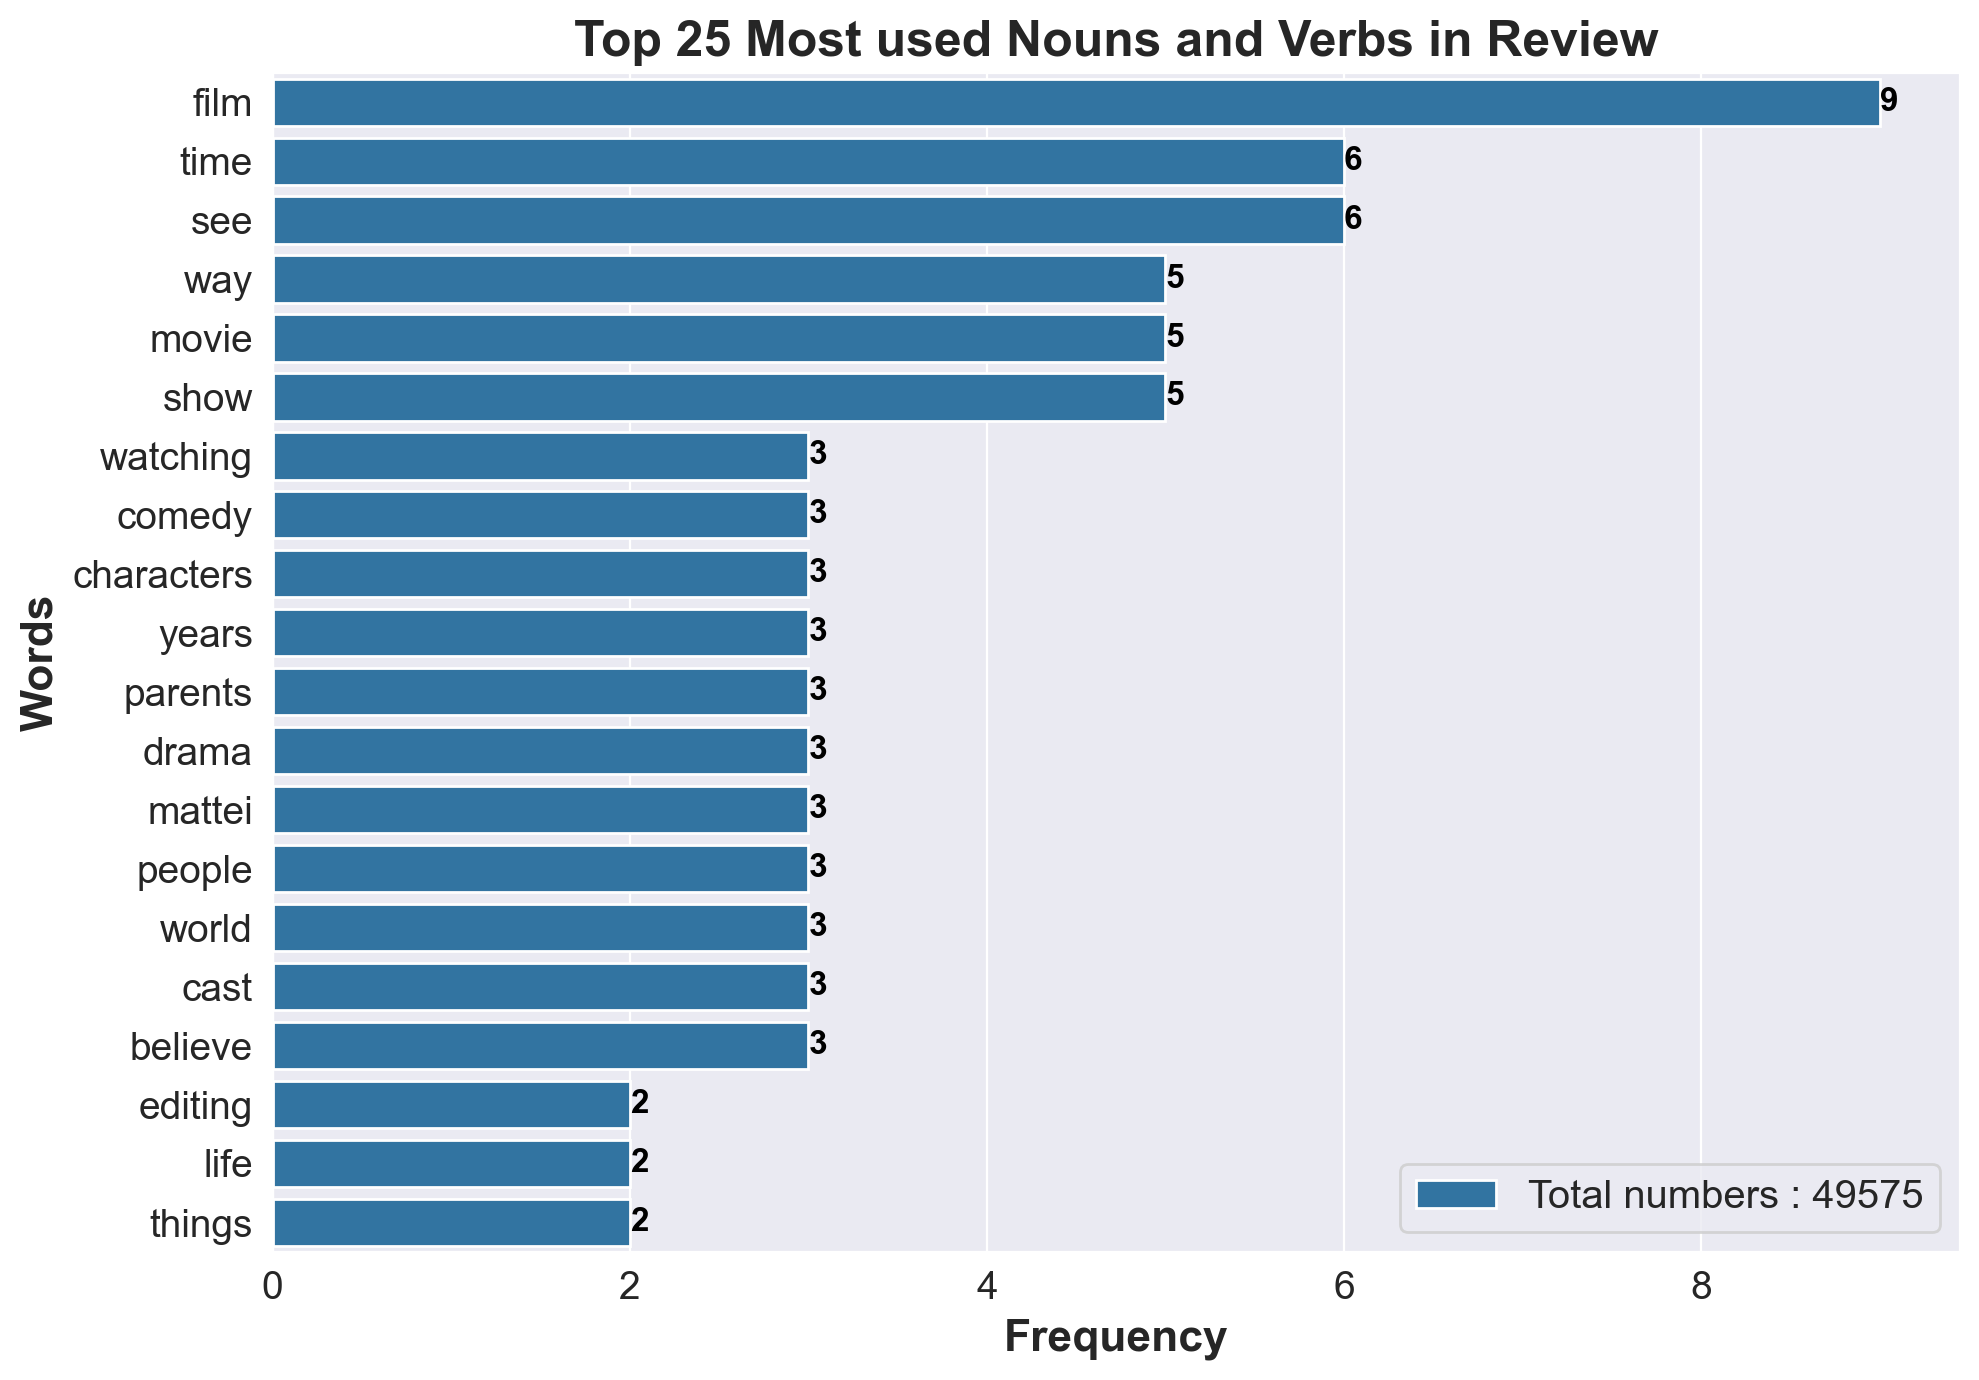

In [80]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab 

fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total numbers : {}'.format(len(df1.clean_review.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Review', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

In [35]:
TextBlob(df['clean_review'][1]).ngrams(1)[:20]

[WordList(['wonderful']),
 WordList(['little']),
 WordList(['production']),
 WordList(['filming']),
 WordList(['technique']),
 WordList(['unassuming']),
 WordList(['old']),
 WordList(['time']),
 WordList(['bbc']),
 WordList(['fashion']),
 WordList(['gives']),
 WordList(['comforting']),
 WordList(['sometimes']),
 WordList(['discomforting']),
 WordList(['sense']),
 WordList(['realism']),
 WordList(['entire']),
 WordList(['piece']),
 WordList(['actors']),
 WordList(['extremely'])]

In [36]:
TextBlob(df['clean_review'][1]).ngrams(2)[:20]

[WordList(['wonderful', 'little']),
 WordList(['little', 'production']),
 WordList(['production', 'filming']),
 WordList(['filming', 'technique']),
 WordList(['technique', 'unassuming']),
 WordList(['unassuming', 'old']),
 WordList(['old', 'time']),
 WordList(['time', 'bbc']),
 WordList(['bbc', 'fashion']),
 WordList(['fashion', 'gives']),
 WordList(['gives', 'comforting']),
 WordList(['comforting', 'sometimes']),
 WordList(['sometimes', 'discomforting']),
 WordList(['discomforting', 'sense']),
 WordList(['sense', 'realism']),
 WordList(['realism', 'entire']),
 WordList(['entire', 'piece']),
 WordList(['piece', 'actors']),
 WordList(['actors', 'extremely']),
 WordList(['extremely', 'well'])]

In [37]:
TextBlob(df['clean_review'][1]).ngrams(3)[:20]

[WordList(['wonderful', 'little', 'production']),
 WordList(['little', 'production', 'filming']),
 WordList(['production', 'filming', 'technique']),
 WordList(['filming', 'technique', 'unassuming']),
 WordList(['technique', 'unassuming', 'old']),
 WordList(['unassuming', 'old', 'time']),
 WordList(['old', 'time', 'bbc']),
 WordList(['time', 'bbc', 'fashion']),
 WordList(['bbc', 'fashion', 'gives']),
 WordList(['fashion', 'gives', 'comforting']),
 WordList(['gives', 'comforting', 'sometimes']),
 WordList(['comforting', 'sometimes', 'discomforting']),
 WordList(['sometimes', 'discomforting', 'sense']),
 WordList(['discomforting', 'sense', 'realism']),
 WordList(['sense', 'realism', 'entire']),
 WordList(['realism', 'entire', 'piece']),
 WordList(['entire', 'piece', 'actors']),
 WordList(['piece', 'actors', 'extremely']),
 WordList(['actors', 'extremely', 'well']),
 WordList(['extremely', 'well', 'chosen'])]

In [38]:

from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with specified parameters
countvec = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=10000)  # Adjust max_features as needed

# Fit and transform the data
ngrams = countvec.fit_transform(df['clean_review'])  # matrix of ngrams

# Get the vocabulary and count frequency of ngrams
vocab = countvec.vocabulary_
count_values = ngrams.sum(axis=0)

# Create DataFrame to display results
df_ngram = pd.DataFrame(sorted([(count_values[0, i], k) for k, i in vocab.items()], reverse=True),
                        columns=['Frequency', 'Unigram_Bigram'])

df_ngram.head()

,Frequency,Unigram_Bigram
0,87934,movie
1,79672,film
2,40160,like
3,29737,good
4,25099,time


# Plotting most used words 

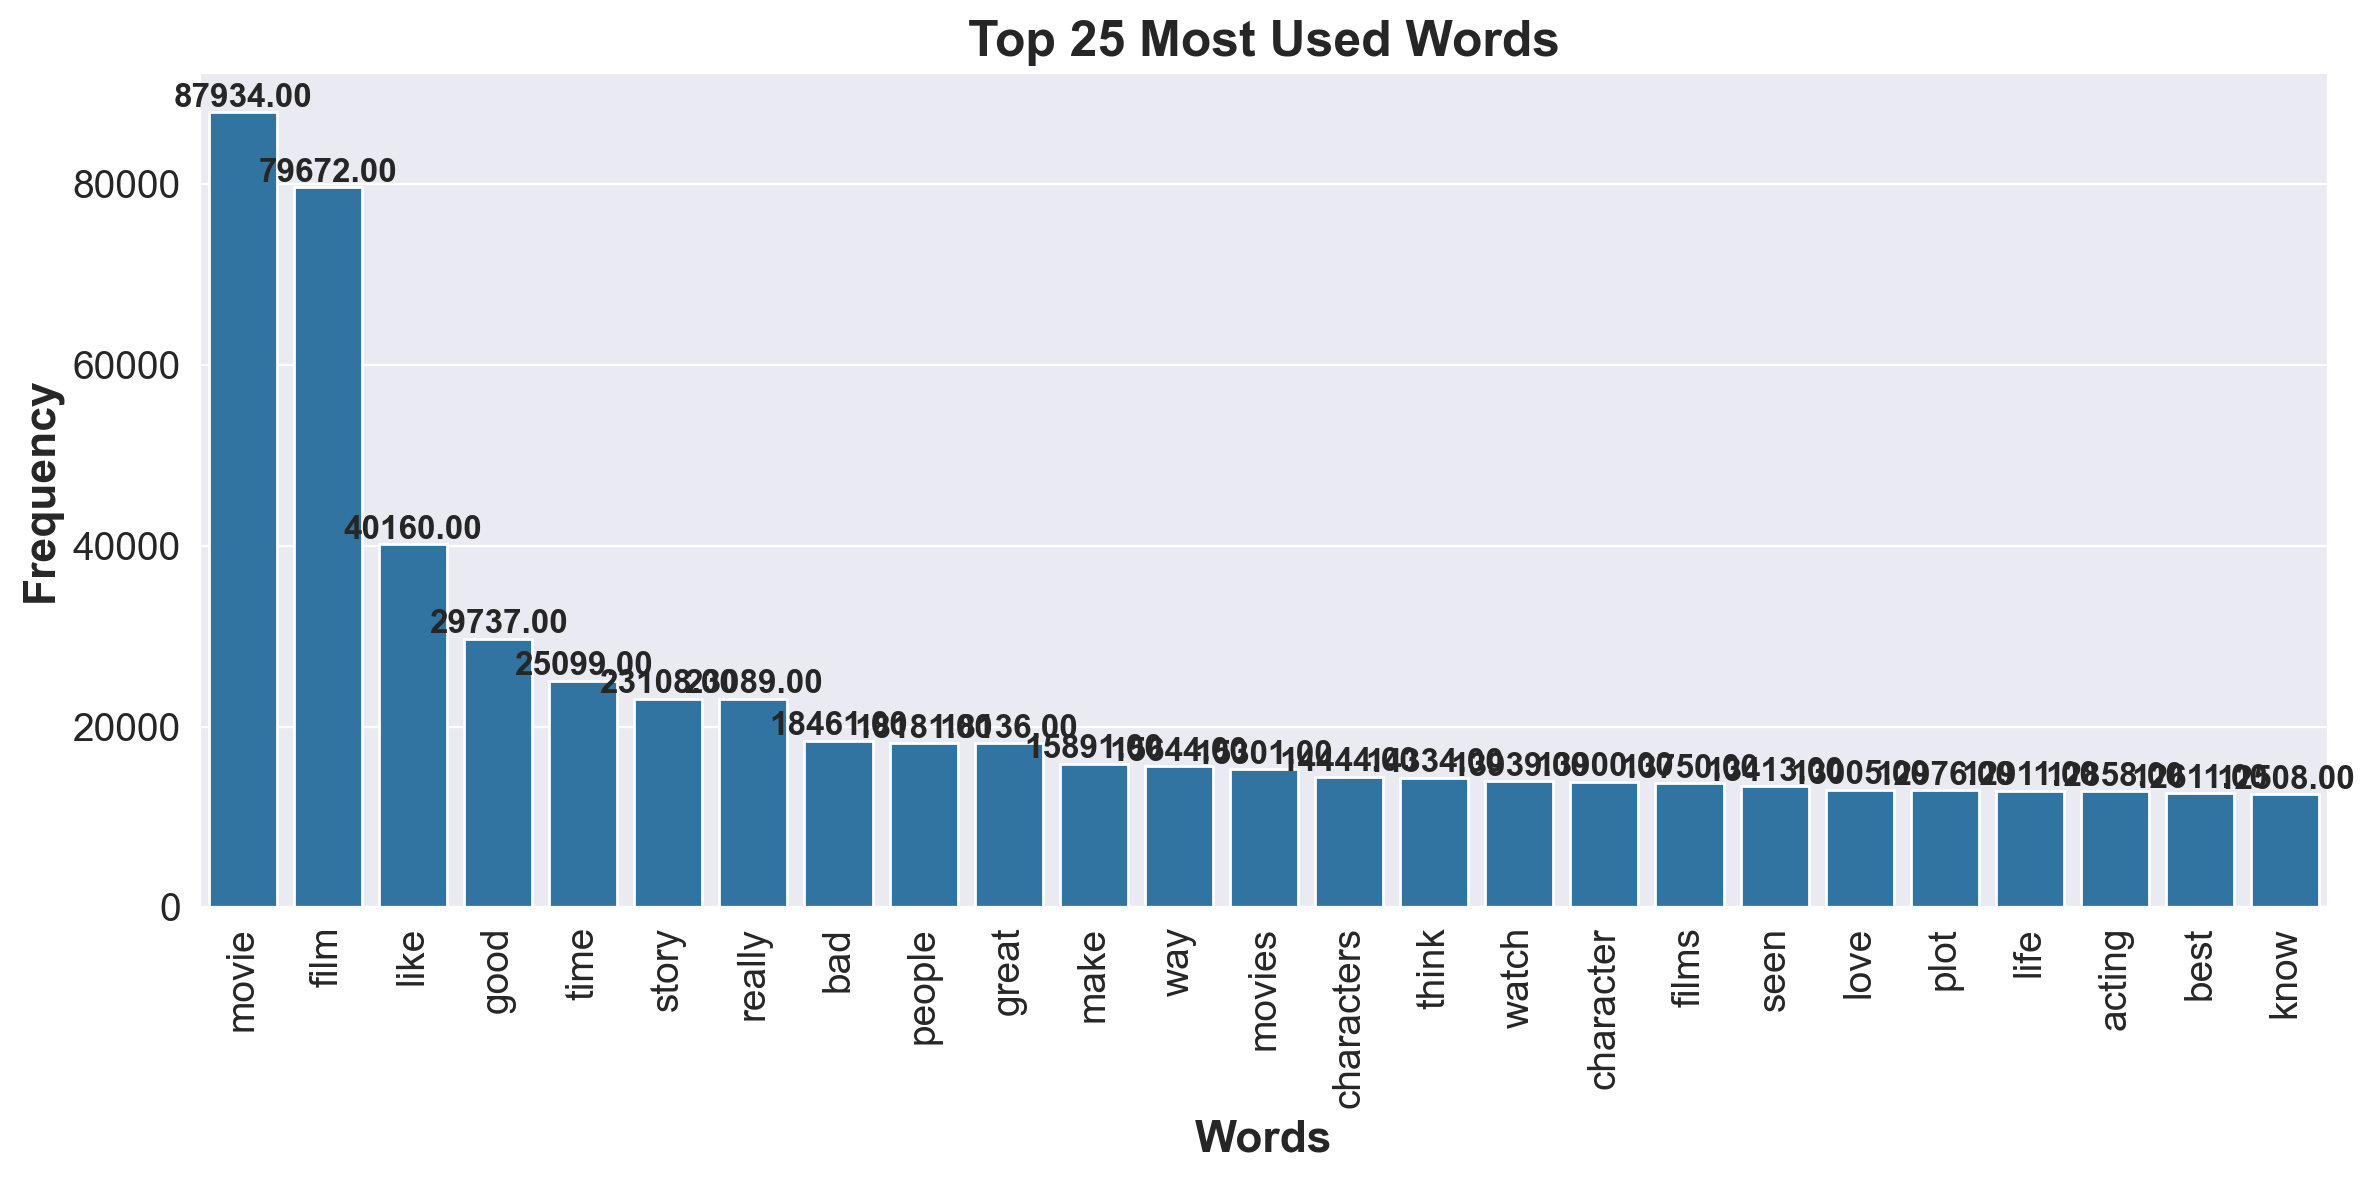

In [39]:

import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your data)
df_ngram = pd.DataFrame(sorted([(count_values[0, i], k) for k, i in vocab.items()], reverse=True),
                        columns=['Frequency', 'Unigram_Bigram'])

# Create a figure and axes
fig, axe = plt.subplots(1, 1, figsize=(12, 6), dpi=200)

# Create the bar plot using seaborn
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram['Frequency'].head(25), ax=axe)

# Set labels and title
axe.set_xlabel('Words', fontsize=16, fontweight='bold')
axe.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.title('Top 25 Most Used Words', fontsize=18, fontweight='bold')

# Add bar labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=12,
                fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

# WordCloud

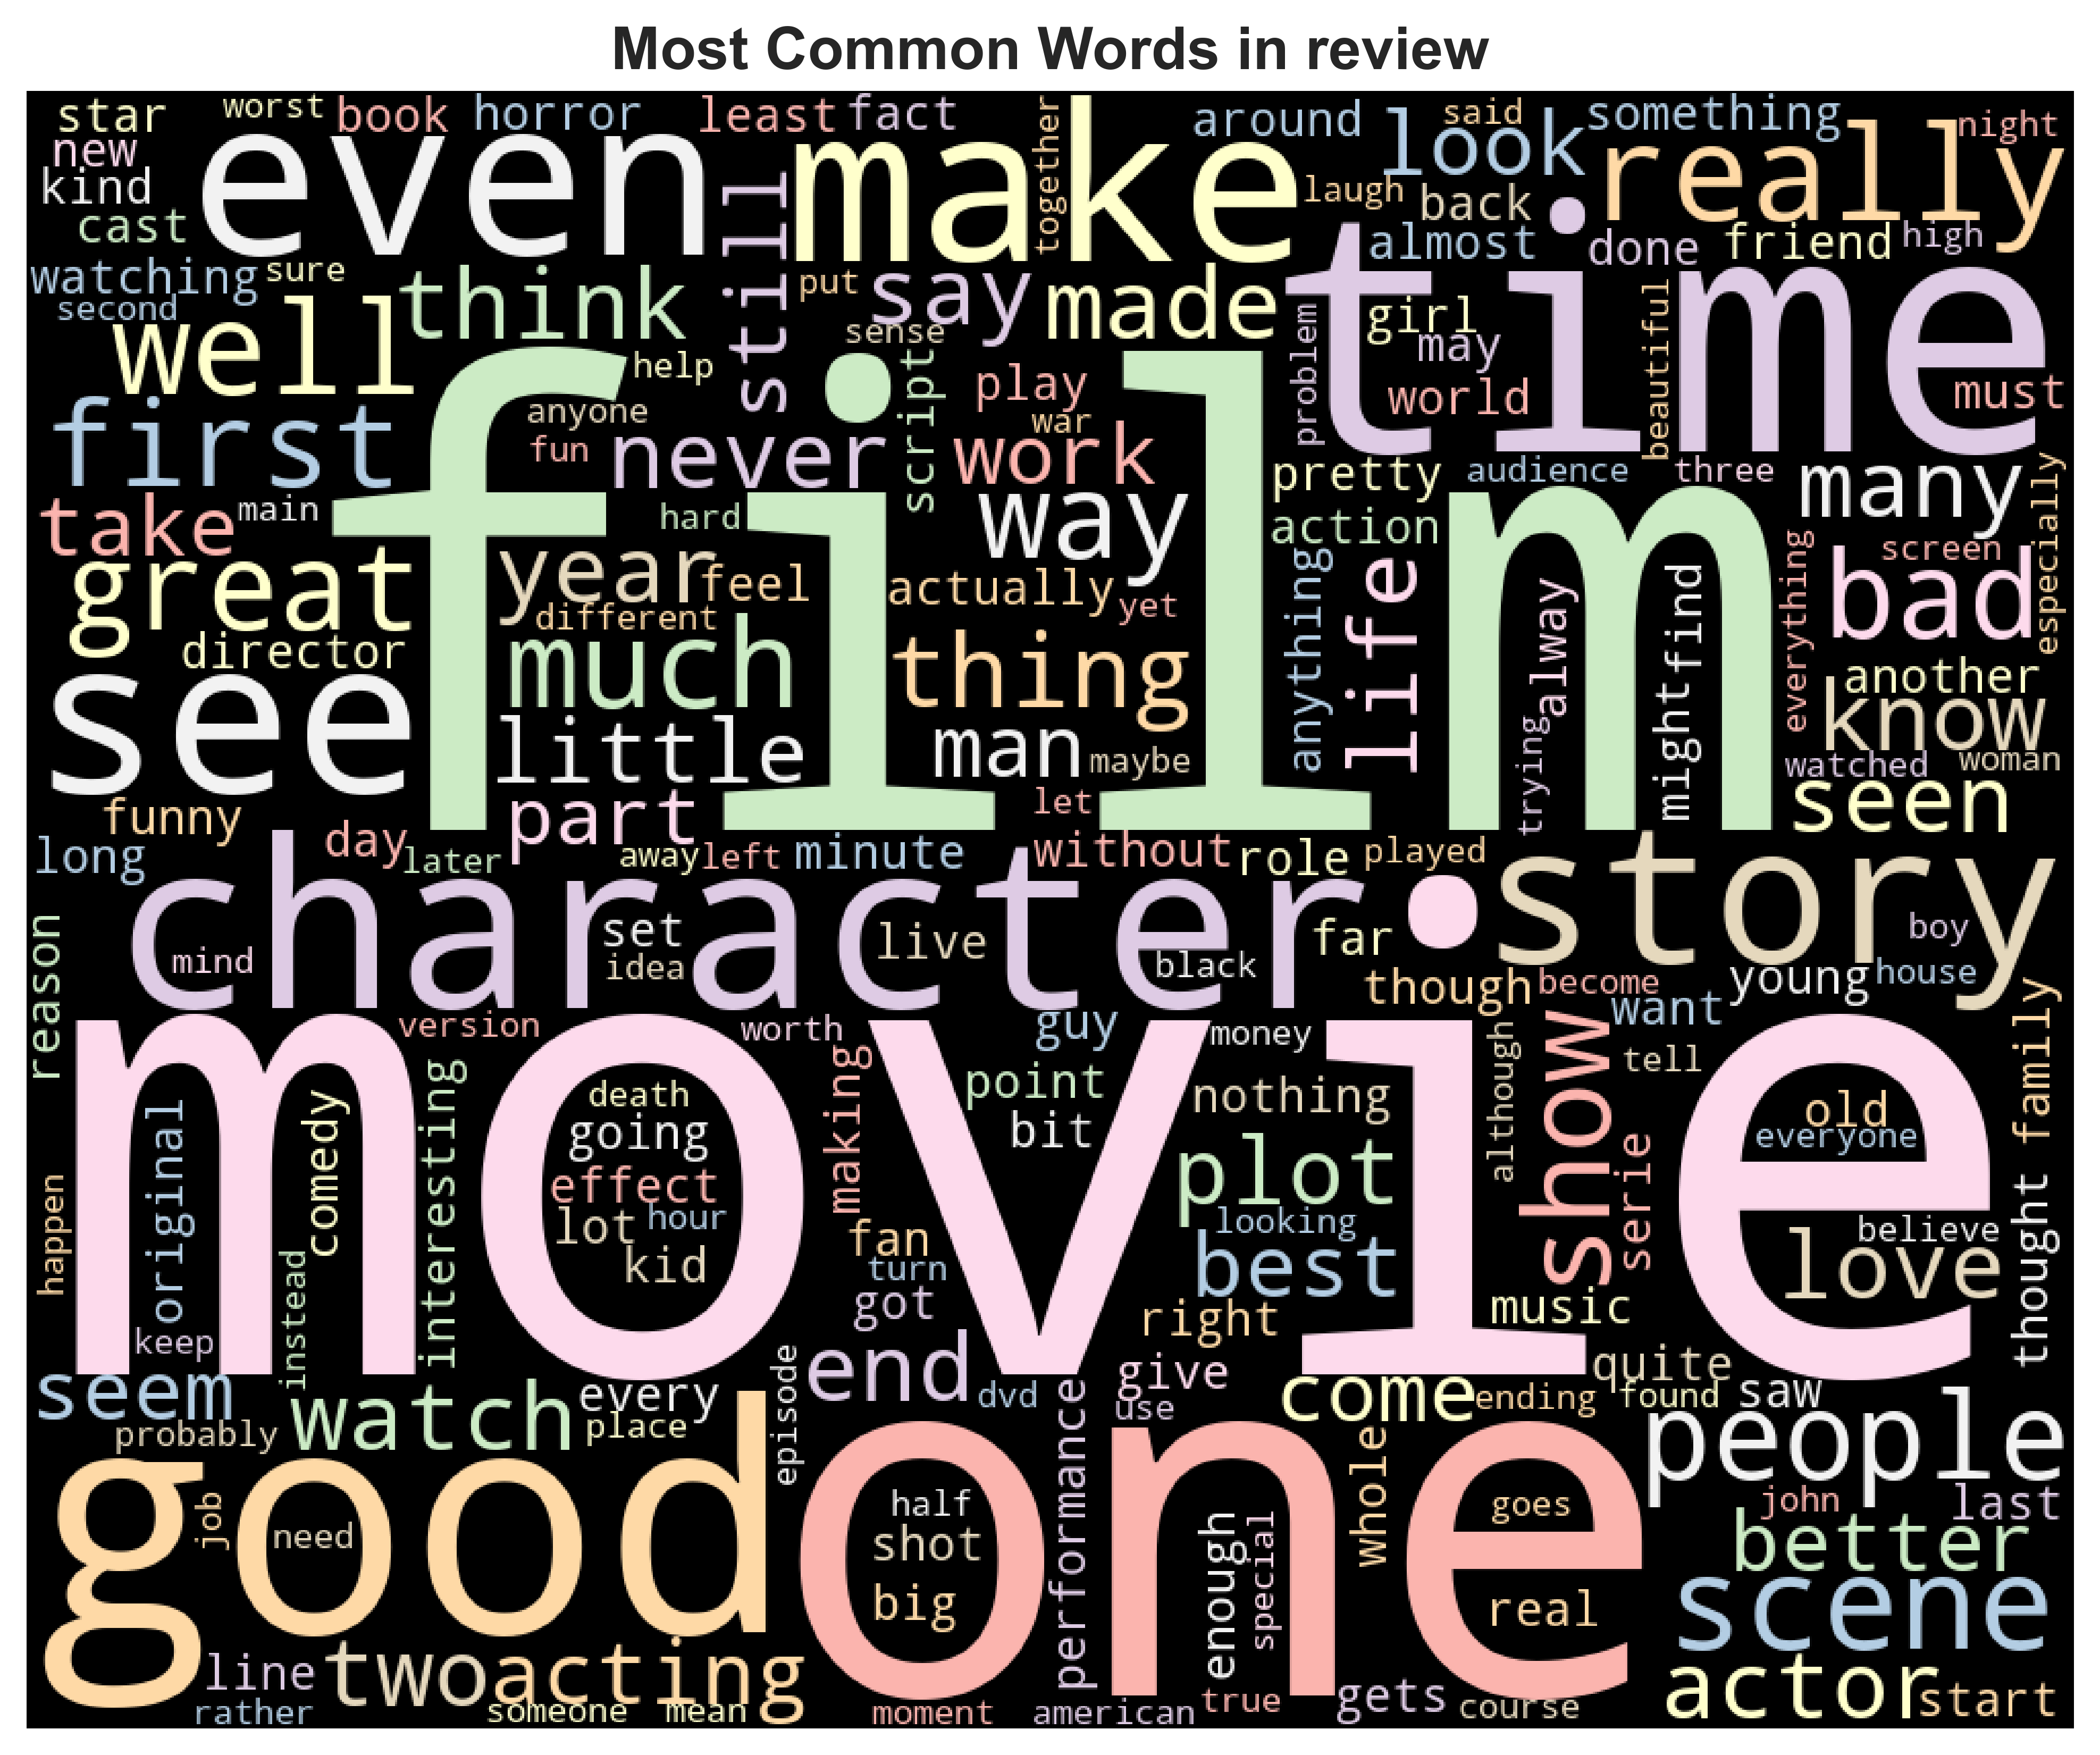

In [41]:
text = " ".join(cat for cat in df.clean_review) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in review', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('clean_review.csv')
df.head()

,sentiment,word_count,char_count,Stopwords,Numerics,clean_review
0,positive,307,1761,122,1,one reviewers mentioned watching episode hooke...
1,positive,162,998,62,0,wonderful little production filming technique ...
2,positive,166,926,70,0,thought wonderful way spend time hot summer we...
3,negative,138,748,58,1,basically family little boy jake thinks zombie...
4,positive,230,1317,92,0,petter mattei love time money visually stunnin...


In [44]:
df.drop(columns=['word_count','char_count','Stopwords','Numerics'], inplace=True)
df.head()


,sentiment,clean_review
0,positive,one reviewers mentioned watching episode hooke...
1,positive,wonderful little production filming technique ...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically family little boy jake thinks zombie...
4,positive,petter mattei love time money visually stunnin...


# labelEncoding

In [45]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["LebelEncoding"]=Encoder.fit_transform(df ["sentiment"])

df

,sentiment,clean_review,LebelEncoding
0,positive,one reviewers mentioned watching episode hooke...,1
1,positive,wonderful little production filming technique ...,1
2,positive,thought wonderful way spend time hot summer we...,1
3,negative,basically family little boy jake thinks zombie...,0
4,positive,petter mattei love time money visually stunnin...,1
...,...,...,...
49995,positive,thought movie right good job creative original...,1
49996,negative,bad plot bad dialogue bad acting idiotic direc...,0
49997,negative,catholic taught parochial elementary schools n...,0
49998,negative,going disagree previous comment side maltin on...,0


In [46]:
df.describe()

,LebelEncoding
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [47]:
df.isnull().sum()

sentiment        0
clean_review     0
LebelEncoding    0
dtype: int64

In [64]:
df.sentiment.value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Splitting into train and test 

In [48]:
x = df['clean_review'].values
y = df['sentiment'].values 

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((37500,), (12500,))

In [50]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [51]:
x_train.shape, x_test.shape


((37500, 89241), (12500, 89241))

In [52]:
print(y_train),print(y_test)

['negative' 'negative' 'negative' ... 'positive' 'positive' 'positive']
['negative' 'negative' 'positive' ... 'positive' 'negative' 'negative']


(None, None)

In [53]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.72
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

    negative       0.72      0.73      0.73      6250
    positive       0.73      0.72      0.72      6250

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500




In [54]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.91
Accuracy of  test set    : 0.87
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

    negative       0.86      0.88      0.87      6250
    positive       0.87      0.86      0.87      6250

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500




In [55]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.85752


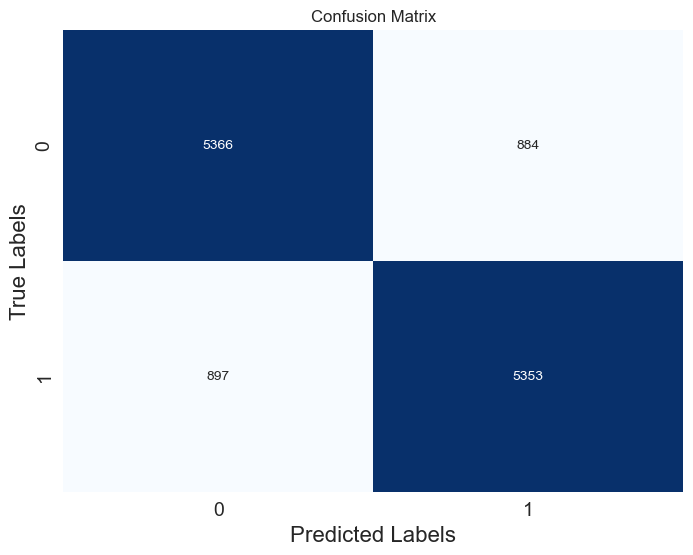

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      6250
    positive       0.86      0.86      0.86      6250

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



In [56]:
 # Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a classification report
class_report = classification_report(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print("Classification Report:")
print(class_report)

# Print some actual vs predicted labels along with ckean_review text


In [61]:

print("Actual vs Predicted Labels with Review Text:")
for review, actual_label, predicted_label in zip(df.clean_review[:10], y_test[:10], y_pred[:10]):
    print("Review Text:", review)
    print("Actual Label:", actual_label)
    print("Predicted Label:", predicted_label)
    print("-----------------------")

Actual vs Predicted Labels with Review Text:
Review Text: one reviewers mentioned watching episode hooked right exactly happened first thing struck brutality unflinching scenes violence set right word trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance mess around first episode ever saw struck nasty surreal say ready watched developed taste got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned 

In [63]:
import joblib

joblib.dump(model_NB,'model_NB.pkl')

['model_NB.pkl']